# Drowsiness Detector

This is a deep learning project where we train a Yolov5 model from scratch based on our data to detect if a person is drowsy i.e. closing their eyes.

YOLOv5 🚀 is a family of compound-scaled object detection models trained on the COCO dataset, and includes simple functionality for Test Time Augmentation (TTA), model ensembling, hyperparameter evolution, and export to ONNX, CoreML and TFLite.

YOLO an acronym for 'You only look once', is an object detection algorithm that divides images into a grid system. Each cell in the grid is responsible for detecting objects within itself.

YOLO is one of the most famous object detection algorithms due to its speed and accuracy.

### Import and Install Packages

Pytorch installed using https://pytorch.org/get-started/locally/

In [1]:
#!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.2+cpu (from versions: 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.1.0.post2, 1.2.0, 1.3.0, 1.3.0.post2, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0)
ERROR: No matching distribution found for torch==1.8.2+cpu


In [2]:
!conda info --envs

# conda environments:
#
base                     /opt/anaconda3
Yolo_check            *  /opt/anaconda3/envs/Yolo_check



In [2]:
!pip3 install torch torchvision torchaudio

  Using cached torch-1.11.0-cp37-none-macosx_10_9_x86_64.whl (129.9 MB)
  Using cached torchvision-0.12.0-cp37-cp37m-macosx_10_9_x86_64.whl (1.3 MB)
  Using cached torchaudio-0.11.0-cp37-cp37m-macosx_10_15_x86_64.whl (2.4 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached Pillow-9.1.1-cp37-cp37m-macosx_10_10_x86_64.whl (3.1 MB)
  Using cached numpy-1.21.6-cp37-cp37m-macosx_10_9_x86_64.whl (16.9 MB)
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)


We are using Yolov5, from the github repo https://github.com/ultralytics/yolov5

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12447, done.
remote: Total 12447 (delta 0), reused 0 (delta 0), pack-reused 12447
Receiving objects: 100% (12447/12447), 12.15 MiB | 2.89 MiB/s, done.
Resolving deltas: 100% (8591/8591), done.


In [2]:
!cd yolov5 & pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


Torch will be used to load the YOLO models and make detections.

Matplotlib for visuals

OpenCV (cv2) to access webcam and render feeds

Numpy for array transformation

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load the model

Pytorch has an inbuilt function which allows us to load Yolov5 models. 

We can observe that this model has the following characteristics:

1. Sequential
2. Uses 2d Convolutional layers
3. Activation function is SiLU - Applies the Sigmoid Linear Unit (SiLU) function, element-wise. The SiLU function is also known as the swish function. Equation is `silu(x)=x∗σ(x),where σ(x) is the logistic sigmoid.`

https://pytorch.org/hub/ultralytics_yolov5/

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/philipnj/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-7-10 Python-3.8.13 torch-1.11.0 CPU

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s_v6 summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

### Make detections

First we check the model and check how it makes detections and frames an object. 
Detections are run on a sample image

In [4]:
img = "https://ultralytics.com/images/zidane.jpg"

The image looks like:

![Zidane](https://ultralytics.com/images/zidane.jpg)

In [5]:
#Running our model on that image and seeing the detections:

results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 1 tie
Speed: 532.4ms pre-process, 343.2ms inference, 9.8ms NMS per image at shape (1, 3, 384, 640)


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

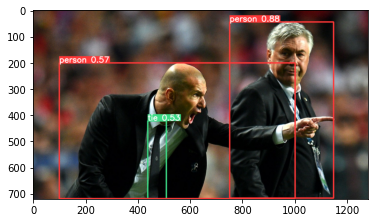

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

### Real Time detection

We also check the same model using live camera feed with the help of OpenCV to do real-time detections

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Train from scratch

We now start to train our model from scratch

1. Create a Folder Called data and a subfolder called images.
2. Define labels as 'awake' amd 'drowsy'
3. Define number of images per class as 20. Therefore, we have a total of 40 images as our training data.
4. Using OpenCV, 20 images are captured for class 1 'awake' and class 2 'drowsy'.

In [4]:
import uuid   # Unique identifier
import os
import time

In [11]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [12]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

We now use LabelImg, an open source pythonand QT based graphic annotation tool that helps us draw a box around the subject in each image or 'tag' the image.

![Zidane](https://raw.githubusercontent.com/tzutalin/labelImg/master/demo/demo3.jpg)

In [13]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2090, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 2090 (delta 43), reused 74 (delta 35), pack-reused 1986
Receiving objects: 100% (2090/2090), 232.91 MiB | 4.71 MiB/s, done.
Resolving deltas: 100% (1226/1226), done.


In [ ]:
!pip install pyqt5 lxml --upgrade

In [14]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Finally, we train our model by going into the yolo folder and calling train.py applying the following parameters:

1. Image size - 360p
2. Batch size - 16
3. Epochs - 500

We also create a yaml file to help the model detect the location of the images and the classes to consider

Then we apply weights are yolov5s and execute

In [16]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/Users/philipnj/Desktop/DS_Projects/Drowsiness': No such file or directory
YOLOv5 🚀 2022-7-9 Python-3.8.13 torch-1.11.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    35/499        0G   0.07712   0.01313   0.03046        18       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.164      0.975      0.207     0.0719

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    36/499        0G   0.09095   0.01104    0.0299        18       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.164      0.975      0.207     0.0719

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    37/499        0G   0.09227   0.01139   0.03021        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.161          1      0.186     0.0997

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    86/499        0G   0.04246  0.008303  0.009378         9       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40       0.98          1      0.995        0.4

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    87/499        0G   0.05771   0.01082   0.01115        14       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40       0.47      0.975       0.82      0.441

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    88/499        0G   0.06413   0.01012   0.01417        18       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40       0.47      0.975       0.82      0.441

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   137/499        0G   0.05543   0.01043   0.01126        25       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.955      0.974       0.99        0.7

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   138/499        0G   0.05236  0.009822   0.01163        21       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.961      0.988      0.995      0.482

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   139/499        0G    0.0487  0.009753  0.008713        24       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.747          1      0.951      0.599

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   188/499        0G   0.04448  0.007421  0.006168        15       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995        0.7

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   189/499        0G   0.04383  0.008516  0.005588        17       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.994          1      0.995      0.806

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   190/499        0G   0.04252  0.008163  0.004108        19       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.964      0.975      0.992      0.772

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   239/499        0G   0.03953  0.009002   0.00484        19       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.996          1      0.995      0.835

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   240/499        0G   0.04196  0.009679  0.006037        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.996          1      0.995      0.835

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   241/499        0G    0.0391  0.008096  0.006208        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995      0.848

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   290/499        0G   0.03952  0.007389  0.005553        17       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995      0.776

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   291/499        0G    0.0403  0.009118  0.004259        24       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995       0.76

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   292/499        0G   0.04385   0.00818   0.00353        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995       0.76

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   341/499        0G    0.0349  0.006437  0.003754        15       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995      0.865

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   342/499        0G   0.03628  0.008499  0.005001        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995      0.871

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   343/499        0G   0.03611  0.007397  0.003259        21       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995       0.86

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   392/499        0G   0.03772  0.006725  0.003521        17       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995      0.853

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   393/499        0G   0.03512  0.006567  0.002539        18       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995      0.875

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   394/499        0G   0.03504  0.007521  0.002379        19       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995      0.844

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   443/499        0G   0.02714  0.005938  0.004168        16       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995      0.892

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   444/499        0G   0.02658  0.006064   0.00396        15       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995      0.892

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   445/499        0G   0.02579  0.006276  0.002088        18       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.995          1      0.995      0.897

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   494/499        0G   0.01898  0.006842  0.002854        15       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.996          1      0.995      0.909

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   495/499        0G   0.01932  0.007094  0.002221        18       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.996          1      0.995      0.909

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   496/499        0G   0.01741  0.006872  0.001985        16       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.996          1      0.995      0.909

     Epoch   gpu_mem       box      

Exception ignored in: <function StorageWeakRef.__del__ at 0x7f950813d0d0>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-packages/torch/multiprocessing/reductions.py", line 36, in __del__
  File "/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-packages/torch/storage.py", line 520, in _free_weak_ref
AttributeError: 'NoneType' object has no attribute '_free_weak_ref'
Exception ignored in: <function StorageWeakRef.__del__ at 0x7f950813d0d0>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-packages/torch/multiprocessing/reductions.py", line 36, in __del__
  File "/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-packages/torch/storage.py", line 520, in _free_weak_ref
AttributeError: 'NoneType' object has no attribute '_free_weak_ref'
Exception ignored in: <function StorageWeakRef.__del__ at 0x7f950813d0d0>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-p

Exception ignored in: <function StorageWeakRef.__del__ at 0x7fa3d97cd940>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-packages/torch/multiprocessing/reductions.py", line 36, in __del__
  File "/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-packages/torch/storage.py", line 520, in _free_weak_ref
AttributeError: 'NoneType' object has no attribute '_free_weak_ref'
Exception ignored in: <function StorageWeakRef.__del__ at 0x7fa3d97cd940>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-packages/torch/multiprocessing/reductions.py", line 36, in __del__
  File "/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-packages/torch/storage.py", line 520, in _free_weak_ref
AttributeError: 'NoneType' object has no attribute '_free_weak_ref'
Exception ignored in: <function StorageWeakRef.__del__ at 0x7fa3d97cd940>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Yolo_check/lib/python3.8/site-p

As we can observe towards the end our model has an accuracy of almost 99%

### Load Model

We load the trained model to test how it works

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/philipnj/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-7-16 Python-3.8.13 torch-1.11.0 CPU

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


Testing it on one of the images we used to train the model.

In [6]:
img = os.path.join('data', 'images', 'awake.4bb49bbe-0016-11ed-a846-8ecd485cc6bf.jpg')

In [7]:
results = model(img)

In [8]:
results.print()

image 1/1: 720x1280 1 awake
Speed: 52.4ms pre-process, 326.0ms inference, 16.1ms NMS per image at shape (1, 3, 384, 640)


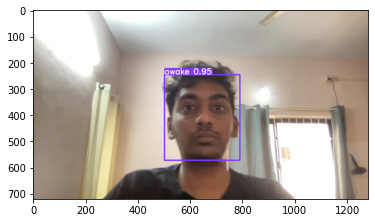

In [21]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

Testing it on a live feed.

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()